In [ ]:

#@title  Data Scenarios and optimal parameters to predict the heat   load    (Winter term/ Workdays/ Model A)

In [ ]:
# The process of model optimization to predict the heat load is carried out by evaluating the effect of including various type of input parameters. 
# We recalibrate the model parameters for prediction purpose.
 

In [ ]:
# we import the required libraries
import numpy as np
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt
from numpy import percentile
import seaborn as sns

In [ ]:
# We upload the generated excel file after implementing the model fitting.
#In the Github repository we go to: Organized Data ==> Data ==> Select the folder: 10259_after_model_fitting ==> Select the file : 10259(winter_workdays)_after_model_fitting.xlsx
from google.colab import files
uploaded = files.upload()

Saving 10259(winter_workdays)_after_model_fitting.xlsx to 10259(winter_workdays)_after_model_fitting.xlsx


In [ ]:
# Convert the excel file into pandas Dataframe
import io 
F = pd.read_excel(io.BytesIO(uploaded['10259(winter_workdays)_after_model_fitting.xlsx']))
F

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation_flux_lag18,Irradiation_flux_lag19,Irradiation_flux_lag20,Irradiation_flux_lag21,Irradiation_flux_lag22,Irradiation_flux_lag23,Irradiation_flux_lag24,resid,predicted,standardized_residuals
0,2019-01-03 00:00:00,3,3,1,2019,49,0,THU,-3.9,4.1,...,3.6,3.6,3.5,2.9,3.3,3.2,2.2,1.3,23.2,0.566976
1,2019-01-03 01:00:00,3,3,1,2019,50,1,THU,-4.1,4.8,...,3.1,3.6,3.6,3.5,2.9,3.3,3.2,-3.3,23.3,-1.477239
2,2019-01-03 02:00:00,3,3,1,2019,51,2,THU,-4.4,4.9,...,3.9,3.1,3.6,3.6,3.5,2.9,3.3,-1.3,22.7,-0.589797
3,2019-01-03 03:00:00,3,3,1,2019,52,3,THU,-4.4,5.6,...,13.7,3.9,3.1,3.6,3.6,3.5,2.9,-2.4,23.0,-1.081111
4,2019-01-03 04:00:00,3,3,1,2019,53,4,THU,-4.5,5.5,...,26.8,13.7,3.9,3.1,3.6,3.6,3.5,0.5,22.8,0.201898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2019-12-31 19:00:00,365,31,12,2019,8756,19,TUE,0.5,4.3,...,3.4,4.4,3.6,4.4,5.2,4.8,4.6,-0.9,19.0,-0.410548
764,2019-12-31 20:00:00,365,31,12,2019,8757,20,TUE,-0.7,3.9,...,3.7,3.4,4.4,3.6,4.4,5.2,4.8,-2.0,19.9,-0.905082
765,2019-12-31 21:00:00,365,31,12,2019,8758,21,TUE,-1.3,4.1,...,3.8,3.7,3.4,4.4,3.6,4.4,5.2,3.1,19.3,1.411411
766,2019-12-31 22:00:00,365,31,12,2019,8759,22,TUE,-1.7,4.0,...,3.9,3.8,3.7,3.4,4.4,3.6,4.4,-2.6,20.1,-1.148218


In [ ]:
#In this context, three different data scenarios have been created to each model in winter and shoulder season.
# 1st Data Scenario: Model with only lagged heat load data
# 2nd Data Scenario: Model with lagged weather data (lagged heat load data + lagged temperature + lagged irradiation flux)
# 3rd Data Scenario: Model with calendar data (lagged heat load data + lagged temperature + lagged irradiation flux + calendar data ) 
# When performing the calibration, we will end up having each Data Scenario with optimal parameters.    

In [ ]:
# We calibrate and refit the model using the ols method
#Adding variables are based on an iterative process that use forward selection method.
#Every addition of input variables (forward selection method) to the model is evaluated using different evaluation metrics such as the Akaike information criterion (AIC), Bayesian information criterion (BIC)and Adjusted R-squared

#Separation of significant indeppendent variables and dependent variables
import pandas as pd
import statsmodels.api as sm
X = F[['POWER1_lag1','POWER1_lag2','POWER1_lag3','Temperature_lag0','Temperature_lag1','Irradiation_flux_lag0','Irradiation_flux_lag1','Tuesday_1h','Wednesday_3h','Wednesday_7h','Monday_8h']] 
Y = F['POWER1_lag0']

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import statsmodels.formula.api as smf
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            POWER1_lag0   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     347.3
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          9.17e-287
Time:                        11:05:38   Log-Likelihood:                -1729.3
No. Observations:                 768   AIC:                             3483.
Df Residuals:                     756   BIC:                             3538.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.75

In [ ]:
#@title  Comparison of Models’ performance with Different Data Scenarios (Winter term/ Workdays / Model A)

In [ ]:
# After identifying the data scenarios with optimal parameters.
# In this part, with the testing data, we choose the  best data scenario that generate more accurate prediction. 
# We use the mean absolute error (MAE) and the root mean square error (RMSE) as evaluation metrics to perform this step.   

In [ ]:
# We upload the testing data  excel file.
# In the Github repository we go to: Organized Data ==> Data ==> Select the folder: 10259_after_model_fitting_testing_data ==> Select the file : 10259(winter_workdays)_after_model_fitting_testing_data.xlsx
from google.colab import files
uploaded = files.upload()

Saving 10259(winter_workdays)_after_model_fitting_testing_data.xlsx to 10259(winter_workdays)_after_model_fitting_testing_data.xlsx


In [ ]:
# Convert the excel file into pandas Dataframe
import io 
F_testing = pd.read_excel(io.BytesIO(uploaded['10259(winter_workdays)_after_model_fitting_testing_data.xlsx']))
F_testing

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation_flux_lag18,Irradiation_flux_lag19,Irradiation_flux_lag20,Irradiation_flux_lag21,Irradiation_flux_lag22,Irradiation_flux_lag23,Irradiation_flux_lag24,resid,predicted,standardized_residuals
0,2019-01-02 00:00:00,2,2,1,2019,25,0,WED,1.7,2.2,...,4.7,5.1,4.9,4.0,4.1,4.2,4.2,-0.2,17.9,-0.100657
1,2019-01-02 01:00:00,2,2,1,2019,26,1,WED,1.8,3.2,...,4.4,4.7,5.1,4.9,4.0,4.1,4.2,-1.0,17.5,-0.418600
2,2019-01-02 02:00:00,2,2,1,2019,27,2,WED,1.8,3.3,...,4.7,4.4,4.7,5.1,4.9,4.0,4.1,-0.6,17.4,-0.236286
3,2019-01-02 03:00:00,2,2,1,2019,28,3,WED,1.2,2.9,...,8.8,4.7,4.4,4.7,5.1,4.9,4.0,0.1,16.9,0.043522
4,2019-01-02 04:00:00,2,2,1,2019,29,4,WED,0.8,3.5,...,22.7,8.8,4.7,4.4,4.7,5.1,4.9,5.4,18.2,2.207386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2019-12-30 19:00:00,364,30,12,2019,8732,19,MON,6.0,4.6,...,3.3,3.9,4.7,6.7,6.1,5.2,3.9,1.0,13.7,0.386200
764,2019-12-30 20:00:00,364,30,12,2019,8733,20,MON,5.9,4.8,...,2.7,3.3,3.9,4.7,6.7,6.1,5.2,0.3,13.9,0.139730
765,2019-12-30 21:00:00,364,30,12,2019,8734,21,MON,6.0,5.2,...,2.6,2.7,3.3,3.9,4.7,6.7,6.1,0.3,13.7,0.140509
766,2019-12-30 22:00:00,364,30,12,2019,8735,22,MON,6.2,4.4,...,2.5,2.6,2.7,3.3,3.9,4.7,6.7,1.5,13.4,0.626429


In [ ]:
# we calculate the MAE metric for the testing data for each data scenario 
# we calculate the RMSE for the testing data for each data scenario
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
# we calculate and print the   mean absolute error (MAE) and root mean square error (RMSE).
error = mae(F_testing['POWER1'], F_testing['predicted'])
print("Mean absolute error : " + str(error))
MSE = np.square(np.subtract(F_testing['POWER1'],F_testing['predicted'])).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)


Mean absolute error : 1.8305468750000002
Root Mean Square Error:

2.4485821790374938


In [ ]:
#@title Seasonal Performance Variations (Winter term/workdays/Model A)


In [ ]:
# We evaluate the performance of the model in each month, where the forecast error varies with time of the days

In [ ]:
# we notice some duplicates appear in the dataset ("F_testing"). They need to be removed. 
F_testing =F_testing.T.drop_duplicates().T
# The duplicates still exist, although we applied the removal process. 
# We decided to remove the duplicates gradually meaning: 
# For example if we want to evaluate the performance of the model on February  at 23:00:
# we filter the dataset to extract the rows belonging to February and then the rows belonging to 23:00 hours on February. 
F_testing =F_testing.T.drop_duplicates().T
F_testing_month=F_testing[(F_testing['Month'] == 2)]
F_testing_month =F_testing_month.T.drop_duplicates().T
F_testing_hours=F_testing_month[(F_testing['Hour_day'] == 23)]
F_testing_hours =F_testing_hours.T.drop_duplicates().T


<ipython-input-16-f5acc7aea127>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  F_testing_hours=F_testing_month[(F_testing['Hour_day'] == 23)]


In [ ]:
# To evaluate the performance of the model in each month at specific hour, we calculate the aggregated values of MAE , RMSE and MAPE (mean absolute error). 
# These metrics are calculated for every hour in each month.  
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
error = mae(F_testing_hours['POWER1'], F_testing_hours['predicted'])
print("Mean absolute error : " + str(error))
MSE = np.square(np.subtract(F_testing_hours['POWER1'],F_testing_hours['predicted'])).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
# We calculate and print the value of MAPE 
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(F_testing_hours['POWER1'], F_testing_hours['predicted'])
print("Mean absolute percentage error :\n")
print(MAPE)

Mean absolute error : 2.0869999999999993
Root Mean Square Error:

2.5464426166713436
Mean absolute percentage error :

0.09066381337304046


In [ ]:
# We collect the aggregated evaluation metrics values (calculated above) in excel file called "seasonal performance variation"
# Note: "the seasonal performance variation" excel file contain all the aggregated evaluation metrics values of all selected models. 
# The evaluation metric data in this file are both for winter and shoulder term.
# In the Github repository we go to: Organized Data ==> Data ==> seasonal performance variation.xlsx

In [ ]:
#We upload the seasonal performance variations file.
from google.colab import files
uploaded = files.upload()

Saving seasonal performance variation.xlsx to seasonal performance variation.xlsx


In [ ]:
# Convert the excel file into pandas Dataframe
import io
dk = pd.read_excel(io.BytesIO(uploaded['seasonal performance variation.xlsx']))
dk

,Hour_day,seasonal_term,type_day,Month,MAE,RMSE,MAPE
0,0,Winter,workday,December,1.388,1.829,0.083
1,1,Winter,workday,December,2.292,2.527,0.135
2,2,Winter,workday,December,1.365,1.527,0.083
3,3,Winter,workday,December,1.333,1.602,0.079
4,4,Winter,workday,December,1.474,1.803,0.089
...,...,...,...,...,...,...,...
427,19,Shoulder,weekend,november,2.098,2.513,0.116
428,20,Shoulder,weekend,november,1.250,1.508,0.076
429,21,Shoulder,weekend,november,2.645,3.545,0.118
430,22,Shoulder,weekend,november,2.451,3.048,0.129


In [ ]:
# We filter the dataframe by month , season and type of the week
#  a new dataframe can be created based on the filtered dataframe. (called 'df_weekday') 
df_month= dk[(dk['Month'] == 'February' )]
df_season=df_month[(df_month['seasonal_term'] == 'Winter')]
df_weekday= df_month[(df_month['type_day'] == 'workday')]
df_weekday


,Hour_day,seasonal_term,type_day,Month,MAE,RMSE,MAPE
48,0,Winter,workday,February,2.047,2.653,0.094
49,1,Winter,workday,February,1.325,1.706,0.072
50,2,Winter,workday,February,1.232,1.353,0.060
51,3,Winter,workday,February,1.160,1.445,0.056
52,4,Winter,workday,February,1.425,1.664,0.069
53,5,Winter,workday,February,1.776,2.750,0.080
54,6,Winter,workday,February,1.562,2.366,0.065
55,7,Winter,workday,February,1.011,1.265,0.048
56,8,Winter,workday,February,2.244,2.853,0.099
57,9,Winter,workday,February,2.236,3.049,0.111


In [ ]:
# In the filtered dataframe ('df_weekday') we convert the MAPE value to percentage (new column : percentage MAPE)
# this process is done to simplify the interpretation of the MAPE value. 
df_weekday['percentage MAPE'] = df_weekday['MAPE'] * 100
df_weekday

<ipython-input-22-e5c43ae9a74b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekday['percentage MAPE'] = df_weekday['MAPE'] * 100


,Hour_day,seasonal_term,type_day,Month,MAE,RMSE,MAPE,percentage MAPE
48,0,Winter,workday,February,2.047,2.653,0.094,9.4
49,1,Winter,workday,February,1.325,1.706,0.072,7.2
50,2,Winter,workday,February,1.232,1.353,0.060,6.0
51,3,Winter,workday,February,1.160,1.445,0.056,5.6
52,4,Winter,workday,February,1.425,1.664,0.069,6.9
53,5,Winter,workday,February,1.776,2.750,0.080,8.0
54,6,Winter,workday,February,1.562,2.366,0.065,6.5
55,7,Winter,workday,February,1.011,1.265,0.048,4.8
56,8,Winter,workday,February,2.244,2.853,0.099,9.9
57,9,Winter,workday,February,2.236,3.049,0.111,11.1


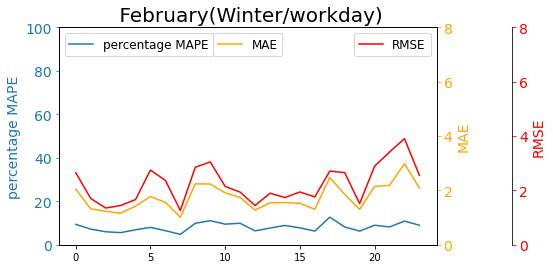

In [ ]:
#We plot the performance of the selected models where the forecast error varies with time of the days:

# we set up the first axis (x:Hour_day , y: percentage MAPE )
fig, ax1 = plt.subplots()
fig.subplots_adjust(right=1)
p1, = ax1.plot(df_weekday['Hour_day'], df_weekday['percentage MAPE']) 
ax1.set_ylabel('percentage MAPE')

ax1.legend(['percentage MAPE'], loc="upper left",fontsize=12)
ax1.yaxis.label.set_color(p1.get_color())
ax1.yaxis.label.set_fontsize(14)
ax1.tick_params(axis='y', colors=p1.get_color(), labelsize=14)
ax1.set_ylim(0, 100)
ax2 = ax1.twinx() 
# we set up the second axis (x:Hour_day , y: MAE )
p2, = ax2.plot(df_weekday['Hour_day'], df_weekday['MAE'], color='orange')
ax2.grid(False) 
ax2.set_ylabel('MAE')
ax2.legend(['MAE'], loc="upper center",fontsize=12)
ax2.set_ylim(0, 8)
ax2.yaxis.label.set_color(p2.get_color())
ax2.yaxis.label.set_fontsize(14)
ax2.tick_params(axis='y', colors=p2.get_color(), labelsize=14)

#  we set up the third axis (x:Hour_day , y: RMSE )
ax3 = ax1.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.20))
p3, = ax3.plot(df_weekday['Hour_day'], df_weekday['RMSE'], color='red')
ax3.set_ylim(0, 8)
ax3.grid(False) 
ax3.set_ylabel('RMSE')

ax3.legend(['RMSE'], loc="upper right",fontsize=12)
ax3.yaxis.label.set_color(p3.get_color())
ax3.yaxis.label.set_fontsize(14)
ax3.tick_params(axis='y', colors=p3.get_color(), labelsize=14)
plt.title(" February(Winter/workday)",fontsize=20)
plt.show()


In [ ]:
# We plot histograms of the forecast error of the selected models. 
#The forecast error distribution is shown for each month in the year along with 10% and 90% quantiles. 

In [ ]:
# we calculate the 10th and 90th percentile of the forecasting error. 
F_testing_month
print("10% quantile =",np.percentile(F_testing_month['resid'],10))
print("90% quantile =",np.percentile(F_testing_month['resid'],90))

10% quantile = -2.3
90% quantile = 2.9299999999999984


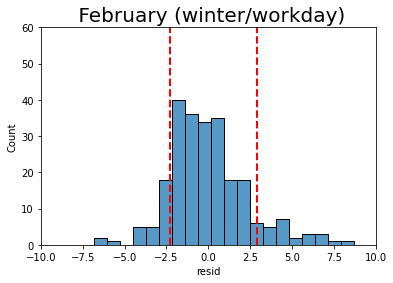

In [ ]:
# Creating the histogram of the forecasting errors
# the two line represent the quantiles (10% quantile and 90 % quantile)
sns.histplot(data=F_testing_month, x="resid",log_scale=False, bins = 20)
plt.axvline(np.percentile(F_testing_month['resid'],10), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(F_testing_month['resid'],90), color='r', linestyle='dashed', linewidth=2)
plt.xlim(-10, 10)
plt.ylim(0, 60)
plt.title(" February (winter/workday)",fontsize=20)
plt.show()

In [ ]:
# At the end, to perform a summury of the hourly forecast error for each month we calculate: 
# the root mean square error (RMSE) 
# the mean error (ME)
# Error Quantiles

In [ ]:
# Calculate RMSE 
MSE = np.square(np.subtract(F_testing_month['POWER1'],F_testing_month['predicted'])).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE) 

# we calculate the mean  error (ME)/ # Note: The denominator represent the number of samples for each month 
ME = sum (F_testing_month['resid'])/240
print("Mean error : " + str(ME))

# we calculate the 10th and 90th percentile of the forecasting error. 
print("10% quantile =",np.percentile(F_testing_month['resid'],10))
print("90% quantile =",np.percentile(F_testing_month['resid'],90))

# we calculate the 1th and 99th percentile of the forecasting error. 
print("1% quantile =",np.percentile(F_testing_month['resid'],1))
print("99% quantile =",np.percentile(F_testing_month['resid'],99))

Root Mean Square Error:

2.337993709002086
Mean error : 0.012916666666666616
10% quantile = -2.3
90% quantile = 2.9299999999999984
1% quantile = -5.22
99% quantile = 6.621999999999997


In [ ]:
#@title (Winter term/ Weekends/ Model B)

In [ ]:
#@title  Data Scenarios and optimal parameters  to predict the heat load (Model B) 

In [ ]:
# We apply the same steps that have been used for the workdays to the weekends model.
# The process of model optimization to predict the heat load is carried out by evaluating the effect of including various type of input parameters. 
# We recalibrate the model parameters for prediction purpose.

In [ ]:
# We upload the generated excel file after implementing the model fitting.
# In the Github repository we go to: Organized Data ==> Data ==> Select the folder: 10259_after_model_fitting ==> Select the file : 10259(winter_weekends)_after_model_fitting.xlsx
from google.colab import files
uploaded = files.upload()

Saving 10259(winter_weekends)_after_model_fitting.xlsx to 10259(winter_weekends)_after_model_fitting.xlsx


In [ ]:
# Convert the excel file into pandas Dataframe
import io 
F1 = pd.read_excel(io.BytesIO(uploaded['10259(winter_weekends)_after_model_fitting.xlsx']))
F1

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation_flux_lag18,Irradiation_flux_lag19,Irradiation_flux_lag20,Irradiation_flux_lag21,Irradiation_flux_lag22,Irradiation_flux_lag23,Irradiation_flux_lag24,resid,predicted,standardized_residuals
0,2019-01-05 00:00:00,5,5,1,2019,97,0,SAT,-3.6,0.7,...,4.9,5.3,5.1,5.2,5.1,4.8,4.9,2.1,23.1,0.874404
1,2019-01-05 01:00:00,5,5,1,2019,98,1,SAT,-4.2,1.2,...,5.0,4.9,5.3,5.1,5.2,5.1,4.8,-0.3,23.5,-0.113675
2,2019-01-05 02:00:00,5,5,1,2019,99,2,SAT,-4.9,1.0,...,5.8,5.0,4.9,5.3,5.1,5.2,5.1,-1.2,22.8,-0.507387
3,2019-01-05 03:00:00,5,5,1,2019,100,3,SAT,-5.2,1.8,...,13.2,5.8,5.0,4.9,5.3,5.1,5.2,1.7,23.7,0.701835
4,2019-01-05 04:00:00,5,5,1,2019,101,4,SAT,-5.6,2.1,...,34.0,13.2,5.8,5.0,4.9,5.3,5.1,-2.7,24.2,-1.121944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2019-12-29 19:00:00,363,29,12,2019,8708,19,SUN,-0.2,3.9,...,5.0,5.0,4.4,4.4,4.9,4.8,4.8,-3.7,20.4,-1.550768
308,2019-12-29 20:00:00,363,29,12,2019,8709,20,SUN,-0.1,5.2,...,5.3,5.0,5.0,4.4,4.4,4.9,4.8,4.9,20.2,2.059074
309,2019-12-29 21:00:00,363,29,12,2019,8710,21,SUN,0.4,6.1,...,5.4,5.3,5.0,5.0,4.4,4.4,4.9,1.1,20.7,0.449130
310,2019-12-29 22:00:00,363,29,12,2019,8711,22,SUN,0.7,6.7,...,5.3,5.4,5.3,5.0,5.0,4.4,4.4,-0.1,19.2,-0.036248


In [ ]:
#In this context, three different data scenarios have been created to each model in winter and shoulder season.
# 1st Data Scenario: Model with only lagged heat load data
# 2nd Data Scenario: Model with lagged weather data (lagged heat load data + lagged temperature + lagged irradiation flux)
# 3rd Data Scenario: Model with calendar data (lagged heat load data + lagged temperature + lagged irradiation flux + calendar data ) 
# When performing the calibration, we will end up having each Data Scenario with optimal parameters.    

In [ ]:
# We calibrate and refit the model using the ols method
#Adding variables are based on an iterative process that use forward selection method.
#Every addition of input variables (forward selection method) to the model is evaluated using different evaluation metrics such as the Akaike information criterion (AIC), Bayesian information criterion (BIC)and Adjusted R-squared

#Separation of significant indeppendent variables and dependent variables
import pandas as pd
import statsmodels.api as sm
X = F1[['POWER1_lag1','Temperature_lag0','Temperature_lag1','Irradiation_flux_lag0','Irradiation_flux_lag1','Saturday_2h','Saturday_10h','Sunday_1h','Sunday_4h','Sunday_5h']] 
Y = F1['POWER1_lag0']

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import statsmodels.formula.api as smf
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            POWER1_lag0   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     79.35
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           2.69e-78
Time:                        16:48:12   Log-Likelihood:                -716.64
No. Observations:                 312   AIC:                             1455.
Df Residuals:                     301   BIC:                             1496.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    15.49

In [ ]:
#@title  Comparison of Models’ performance with Different Data Scenarios (Model B)

In [ ]:
# After identifying the data scenarios with optimal parameters.
# In this part, with the testing data, we choose the  best data scenario that generate more accurate prediction. 
# We use the mean absolute error (MAE) and the root mean square error (RMSE) as evaluation metrics to perform this step.  

In [ ]:
# We upload the testing data  excel file.
# In the Github repository we go to: Organized Data ==> Data ==> Select the folder: 10259_after_model_fitting_testing_data ==> Select the file : 10259(winter_weekends)_after_model_fitting_testing_data.xlsx
from google.colab import files
uploaded = files.upload()

Saving 10259(winter_weekends)_after_model_fitting_testing_data.xlsx to 10259(winter_weekends)_after_model_fitting_testing_data.xlsx


In [ ]:
# Convert the excel file into pandas Dataframe
import io 
F1_testing = pd.read_excel(io.BytesIO(uploaded['10259(winter_weekends)_after_model_fitting_testing_data.xlsx']))
F1_testing

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation_flux_lag18,Irradiation_flux_lag19,Irradiation_flux_lag20,Irradiation_flux_lag21,Irradiation_flux_lag22,Irradiation_flux_lag23,Irradiation_flux_lag24,resid,predicted,standardized_residuals
0,2019-01-06 00:00:00,6,6,1,2019,121,0,SUN,-8.6,0.5,...,2.6,2.4,2.1,1.8,1.0,1.2,0.7,1.9,31.9,0.707576
1,2019-01-06 01:00:00,6,6,1,2019,122,1,SUN,-8.2,0.4,...,2.6,2.6,2.4,2.1,1.8,1.0,1.2,4.7,31.2,1.870687
2,2019-01-06 02:00:00,6,6,1,2019,123,2,SUN,-8.0,0.7,...,2.9,2.6,2.6,2.4,2.1,1.8,1.0,4.1,31.1,1.521336
3,2019-01-06 03:00:00,6,6,1,2019,124,3,SUN,-7.6,2.1,...,10.6,2.9,2.6,2.6,2.4,2.1,1.8,-0.5,30.6,-0.200390
4,2019-01-06 04:00:00,6,6,1,2019,125,4,SUN,-7.3,2.6,...,29.0,10.6,2.9,2.6,2.6,2.4,2.1,-3.9,26.7,-1.552766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2019-12-28 19:00:00,362,28,12,2019,8684,19,SAT,-3.1,4.8,...,5.0,5.0,4.8,4.7,4.9,5.1,4.6,-3.1,21.7,-1.151174
284,2019-12-28 20:00:00,362,28,12,2019,8685,20,SAT,-3.2,4.8,...,5.0,5.0,5.0,4.8,4.7,4.9,5.1,1.5,22.3,0.556150
285,2019-12-28 21:00:00,362,28,12,2019,8686,21,SAT,-3.1,4.9,...,4.9,5.0,5.0,5.0,4.8,4.7,4.9,-3.8,23.8,-1.368338
286,2019-12-28 22:00:00,362,28,12,2019,8687,22,SAT,-3.2,4.4,...,5.1,4.9,5.0,5.0,5.0,4.8,4.7,-2.6,22.7,-0.932805


In [ ]:
# we calculate the MAE metric for the testing data for each data scenario 
# we calculate the RMSE for the testing data for each data scenario
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
# we calculate  mean absolute error (MAE) 
error = mae(F1_testing['POWER1_lag0'], F1_testing['predicted'])
# We print the value of MAE and RMSE
print("Mean absolute error : " + str(error))
MSE = np.square(np.subtract(F1_testing['POWER1_lag0'],F1_testing['predicted'])).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
# We print the value of MAPE 


Mean absolute error : 1.987951388888889
Root Mean Square Error:

2.7147634565464447


In [ ]:
#@title Seasonal Performance Variations (Model B)

In [ ]:
# We evaluate the performance of the model in each month, where the forecast error varies with time of the days

In [ ]:
# we notice some duplicates appear in the dataset ("F1_testing"). They need to be removed.
F1_testing =F1_testing.T.drop_duplicates().T
# The duplicates still exist, although we applied the removal process. 
# We decided to remove the duplicates gradually meaning: 
# For example if we want to evaluate the performance of the model on February  at 23:00:
# we filter the dataset to extract the rows belonging to February and then the rows belonging to 23:00 hours on February. 
F1_testing_month=F1_testing[(F1_testing['Month'] == 2)]
F1_testing_month =F1_testing_month.T.drop_duplicates().T
F1_testing_hours=F1_testing_month[(F1_testing['Hour_day'] == 23)]
F1_testing_hours =F1_testing_hours.T.drop_duplicates().T

<ipython-input-43-b4b731726ffd>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  F1_testing_hours=F1_testing_month[(F1_testing['Hour_day'] == 23)]


In [ ]:
# To evaluate the performance of the model in each month at specific hour, we calculate the aggregated values of MAE , RMSE and MAPE (mean absolute error). 
# These metrics are calculated for every hour in each month.
# we calculate  mean absolute error (MAE) 
error = mae(F1_testing_hours['POWER1'], F1_testing_hours['predicted'])
# We print the value of MAE and RMSE
print("Mean absolute error : " + str(error))
MSE = np.square(np.subtract(F1_testing_hours['POWER1'],F1_testing_hours['predicted'])).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
from sklearn.metrics import mean_absolute_percentage_error
# We print the value of MAPE
MAPE = mean_absolute_percentage_error(F1_testing_hours['POWER1'], F1_testing_hours['predicted'])
print("Mean absolute percentage error :\n")
print(MAPE)

Mean absolute error : 2.374999999999999
Root Mean Square Error:

2.708782014116307
Mean absolute percentage error :

0.1141716876896516


In [ ]:
# We collect the aggregated evaluation metrics values (calculated above) in excel file called "seasonal performance variation"
# Note: "the seasonal performance variation" excel file contain all the aggregated evaluation metrics values of all selected models. 
# The evaluation metric data in this file are both for winter and shoulder term.
# In the Github repository we go to: Organized Data ==> Data ==> seasonal performance variation.xlsx

In [ ]:
# We upload the seasonal performance variations file
from google.colab import files
uploaded = files.upload()

Saving seasonal performance variation.xlsx to seasonal performance variation (1).xlsx


In [ ]:
# Convert the excel file into pandas Dataframe
import io
dk = pd.read_excel(io.BytesIO(uploaded['seasonal performance variation.xlsx']))
dk

,Hour_day,seasonal_term,type_day,Month,MAE,RMSE,MAPE
0,0,Winter,workday,December,1.388,1.829,0.083
1,1,Winter,workday,December,2.292,2.527,0.135
2,2,Winter,workday,December,1.365,1.527,0.083
3,3,Winter,workday,December,1.333,1.602,0.079
4,4,Winter,workday,December,1.474,1.803,0.089
...,...,...,...,...,...,...,...
427,19,Shoulder,weekend,november,2.098,2.513,0.116
428,20,Shoulder,weekend,november,1.250,1.508,0.076
429,21,Shoulder,weekend,november,2.645,3.545,0.118
430,22,Shoulder,weekend,november,2.451,3.048,0.129


In [ ]:
#we filter the dataframe by month , season and type of the week 
df_month= dk[(dk['Month'] == 'February' )]
df_season=df_month[(df_month['seasonal_term'] == 'Winter')]
df_weekday= df_month[(df_month['type_day'] == 'weekend')]
df_weekday


,Hour_day,seasonal_term,type_day,Month,MAE,RMSE,MAPE
120,0,Winter,weekend,February,1.732,2.178,0.084
121,1,Winter,weekend,February,2.393,2.877,0.112
122,2,Winter,weekend,February,1.170,1.270,0.062
123,3,Winter,weekend,February,1.402,1.519,0.068
124,4,Winter,weekend,February,1.174,1.346,0.062
125,5,Winter,weekend,February,1.336,1.497,0.072
126,6,Winter,weekend,February,0.431,0.465,0.022
127,7,Winter,weekend,February,2.198,2.567,0.104
128,8,Winter,weekend,February,1.491,1.897,0.070
129,9,Winter,weekend,February,1.428,1.653,0.078


In [ ]:
# In the filtered dataframe ('df_weekday') we convert the MAPE value to percentage (new column : percentage MAPE)
# this process is done to simplify the interpretation of the MAPE value.
df_weekday['percentage MAPE'] = df_weekday['MAPE'] * 100
df_weekday

<ipython-input-49-dc32a4d488b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekday['percentage MAPE'] = df_weekday['MAPE'] * 100


,Hour_day,seasonal_term,type_day,Month,MAE,RMSE,MAPE,percentage MAPE
120,0,Winter,weekend,February,1.732,2.178,0.084,8.4
121,1,Winter,weekend,February,2.393,2.877,0.112,11.2
122,2,Winter,weekend,February,1.170,1.270,0.062,6.2
123,3,Winter,weekend,February,1.402,1.519,0.068,6.8
124,4,Winter,weekend,February,1.174,1.346,0.062,6.2
125,5,Winter,weekend,February,1.336,1.497,0.072,7.2
126,6,Winter,weekend,February,0.431,0.465,0.022,2.2
127,7,Winter,weekend,February,2.198,2.567,0.104,10.4
128,8,Winter,weekend,February,1.491,1.897,0.070,7.0
129,9,Winter,weekend,February,1.428,1.653,0.078,7.8


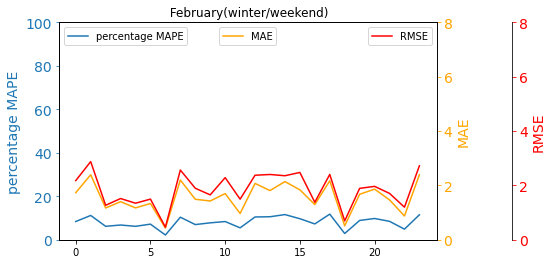

In [ ]:
#We plot the performance of the selected models where the forecast error varies with time of the days:

# we set up the first axis (x:Hour_day , y: percentage MAPE )
fig, ax1 = plt.subplots()
fig.subplots_adjust(right=1)
p1, = ax1.plot(df_weekday['Hour_day'], df_weekday['percentage MAPE']) 
ax1.set_ylabel('percentage MAPE')

ax1.legend(['percentage MAPE'], loc="upper left")
ax1.yaxis.label.set_color(p1.get_color())
ax1.yaxis.label.set_fontsize(14)
ax1.tick_params(axis='y', colors=p1.get_color(), labelsize=14)
ax1.set_ylim(0, 100)
ax2 = ax1.twinx() 
# we set up the second axis (x:Hour_day , y: MAE )
p2, = ax2.plot(df_weekday['Hour_day'], df_weekday['MAE'], color='orange')
ax2.grid(False) 
ax2.set_ylabel('MAE')
ax2.legend(['MAE'], loc="upper center")
ax2.set_ylim(0, 8)
ax2.yaxis.label.set_color(p2.get_color())
ax2.yaxis.label.set_fontsize(14)
ax2.tick_params(axis='y', colors=p2.get_color(), labelsize=14)

#  we set up the third axis (x:Hour_day , y: RMSE )
ax3 = ax1.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.20))
p3, = ax3.plot(df_weekday['Hour_day'], df_weekday['RMSE'], color='red')
ax3.set_ylim(0, 8)
ax3.grid(False) 
ax3.set_ylabel('RMSE')

ax3.legend(['RMSE'], loc="upper right")
ax3.yaxis.label.set_color(p3.get_color())
ax3.yaxis.label.set_fontsize(14)
ax3.tick_params(axis='y', colors=p3.get_color(), labelsize=14)
plt.title(" February(winter/weekend)")
plt.show()


In [ ]:
# We plot histograms of the forecast error of the selected models. 
#The forecast error distribution is shown for each month in the year along with 10% and 90% quantiles.

In [ ]:
# we display the monthly dataset  
F1_testing_month

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation_flux_lag18,Irradiation_flux_lag19,Irradiation_flux_lag20,Irradiation_flux_lag21,Irradiation_flux_lag22,Irradiation_flux_lag23,Irradiation_flux_lag24,resid,predicted,standardized_residuals
96,2019-02-02 00:00:00,33,2,2,2019,769,0,SAT,-1.7,1.0,...,1.5,1.8,1.6,1.8,1.7,1.6,1.7,3.6,21.7,1.315316
97,2019-02-02 01:00:00,33,2,2,2019,770,1,SAT,-1.6,1.0,...,1.2,1.5,1.8,1.6,1.8,1.7,1.6,0.6,23.1,0.227483
98,2019-02-02 02:00:00,33,2,2,2019,771,2,SAT,-1.5,1.4,...,3.6,1.2,1.5,1.8,1.6,1.8,1.7,-1.8,22.2,-0.712336
99,2019-02-02 03:00:00,33,2,2,2019,772,3,SAT,-1.4,1.9,...,16.0,3.6,1.2,1.5,1.8,1.6,1.8,1.7,21.5,0.61652
100,2019-02-02 04:00:00,33,2,2,2019,773,4,SAT,-1.3,1.5,...,40.6,16.0,3.6,1.2,1.5,1.8,1.6,-1.3,22.2,-0.487102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2019-02-24 19:00:00,55,24,2,2019,1316,19,SUN,2.1,1.9,...,3.4,3.4,2.0,1.2,1.0,1.0,2.3,-0.7,18.4,-0.265038
188,2019-02-24 20:00:00,55,24,2,2019,1317,20,SUN,2.3,1.7,...,3.4,3.4,3.4,2.0,1.2,1.0,1.0,1.4,18.0,0.524232
189,2019-02-24 21:00:00,55,24,2,2019,1318,21,SUN,1.8,0.4,...,4.0,3.4,3.4,3.4,2.0,1.2,1.0,-0.1,18.5,-0.031988
190,2019-02-24 22:00:00,55,24,2,2019,1319,22,SUN,1.7,0.2,...,4.1,4.0,3.4,3.4,3.4,2.0,1.2,-0.2,18.5,-0.060422


In [ ]:
# we calculate the 10th and 90th percentile of the forecasting error. 
print("10% quantile =",np.percentile(F1_testing_month['resid'],10))
print("90% quantile =",np.percentile(F1_testing_month['resid'],90))

10% quantile = -1.75
90% quantile = 3.55


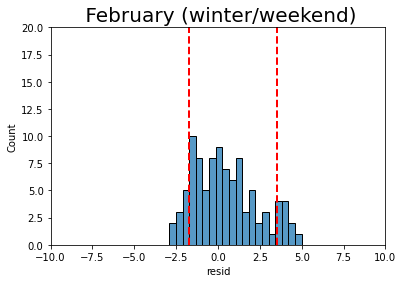

In [ ]:
# Creating the histogram of the forecasting errors
# the two line represent the quantiles (10% quantile and 90 % quantile)
sns.histplot(data=F1_testing_month, x="resid",log_scale=False, bins = 20)
plt.axvline(np.percentile(F1_testing_month['resid'],10), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(F1_testing_month['resid'],90), color='r', linestyle='dashed', linewidth=2)
plt.xlim(-10, 10)
plt.ylim(0, 20)
plt.title(" February (winter/weekend)",fontsize=20)
plt.show()

In [ ]:
# At the end, to perform a summury of the hourly forecast error for each month we calculate: 
# the root mean square error (RMSE) 
# the mean error (ME)
# Error Quantiles

In [ ]:
# Calculate RMSE 
MSE = np.square(np.subtract(F1_testing_month['POWER1'],F1_testing_month['predicted'])).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE) 

# we calculate the mean  error (ME)/ # Note : the denominator represent the number of samples for each month 
ME = sum (F1_testing_month['resid'])/122 
print("Mean error : " + str(ME))

# we calculate the 10th and 90th percentile of the forecasting error. 
print("10% quantile =",np.percentile(F1_testing_month['resid'],10))
print("90% quantile =",np.percentile(F1_testing_month['resid'],90))

# we calculate the 1th and 99th percentile of the forecasting error. 
print("1% quantile =",np.percentile(F1_testing_month['resid'],1))
print("99% quantile =",np.percentile(F1_testing_month['resid'],99))

Root Mean Square Error:

1.9588134163314272
Mean error : 0.3442622950819671
10% quantile = -1.75
90% quantile = 3.55
1% quantile = -2.615
99% quantile = 4.429999999999999
